In [1]:
# Parte 1: Carregamento e Inspeção Inicial dos Dados

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração do estilo dos gráficos para melhor visualização
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)

# Carregando os Arquivos CSV

print("\nCarregando os arquivos CSV a partir do GitHub...")


url_cadastro = 'https://raw.githubusercontent.com/2025-2-NCC4/Projeto1/refs/heads/main/documentos/Entrega%201/Projeto%20Interdisciplinar%20Ci%C3%AAncia%20de%20Dados/Base%20de%20Dados/Base_Cadastral_de_Players.csv'
url_transacoes = 'https://raw.githubusercontent.com/2025-2-NCC4/Projeto1/refs/heads/main/documentos/Entrega%201/Projeto%20Interdisciplinar%20Ci%C3%AAncia%20de%20Dados/Base%20de%20Dados/Base_de_Transacoes_e_Cupons_Capturados.csv'
url_pedestres = 'https://raw.githubusercontent.com/2025-2-NCC4/Projeto1/refs/heads/main/documentos/Entrega%201/Projeto%20Interdisciplinar%20Ci%C3%AAncia%20de%20Dados/Base%20de%20Dados/Base_Simulada_de_Pedestres_Av__Paulista.csv'
url_massa_teste = 'https://raw.githubusercontent.com/2025-2-NCC4/Projeto1/refs/heads/main/documentos/Entrega%201/Projeto%20Interdisciplinar%20Ci%C3%AAncia%20de%20Dados/Base%20de%20Dados/Massa_de_Teste_com_Lojas_e_Valores.csv'

try:
    df_cadastro = pd.read_csv(url_cadastro, delimiter=';')
    df_transacoes = pd.read_csv(url_transacoes, delimiter=';')
    df_pedestres = pd.read_csv(url_pedestres, delimiter=';')
    df_massa_teste = pd.read_csv(url_massa_teste, delimiter=';')
    print("Todos os arquivos foram carregados com sucesso.")
except Exception as e:

    print(f"Ocorreu um erro ao carregar os dados da URL: {e}")
    exit()


#Inspeção Inicial dos DataFrames

dataframes = {
    "Cadastro de Players": df_cadastro,
    "Transações e Cupons": df_transacoes,
    "Pedestres Av. Paulista": df_pedestres,
    "Massa de Teste": df_massa_teste
}

for name, df in dataframes.items():
    print(f"\nInspeção do DataFrame: {name}")
    print("\n 5 primeiras linhas:")
    print(df.head())

    print(f"\n Dimensões (Linhas, Colunas): {df.shape}")

    print("\n Resumo do DataFrame:")
    df.info()

print("\n Inspeção concluída.")


Carregando os arquivos CSV a partir do GitHub...
Todos os arquivos foram carregados com sucesso.

Inspeção do DataFrame: Cadastro de Players

 5 primeiras linhas:
           celular data_nascimento  idade       sexo cidade_residencial  \
0  (11) 91409-5506      12/10/1969     55  Masculino          São Paulo   
1  (11) 91520-1488      19/02/1981     44  Masculino          São Paulo   
2  (11) 98359-5557      10/09/1979     45  Masculino          São Paulo   
3  (11) 96514-2674      05/03/1957     68  Masculino          São Paulo   
4  (11) 99785-3045      30/10/1969     55   Feminino          São Paulo   

  bairro_residencial cidade_trabalho bairro_trabalho cidade_escola  \
0                 Sé             NaN             NaN           NaN   
1           Ipiranga             NaN             NaN           NaN   
2            Santana             NaN             NaN           NaN   
3              Penha             NaN             NaN           NaN   
4            Tatuapé             Na

In [2]:
# Parte 2: Verificação da Qualidade e Limpeza dos Dados

# 2.1 Tratamento do DataFrame de Cadastro (df_cadastro)

print("\nTratando o DataFrame: Cadastro de Players")

# Verificação de valores ausentes
print("\nContagem de valores ausentes por coluna:")
print(df_cadastro.isnull().sum())

# Conversão de tipos de dados
print("\nConvertendo tipos de dados...")
df_cadastro['data_nascimento'] = pd.to_datetime(df_cadastro['data_nascimento'], errors='coerce')

# Verificação de duplicatas
duplicated_rows = df_cadastro.duplicated().sum()
print(f"\nNúmero de linhas duplicadas: {duplicated_rows}")

# Consistência dos dados categóricos
print("\nValores únicos na coluna 'sexo':")
print(df_cadastro['sexo'].value_counts())
print("\nValores únicos na coluna 'cidade_residencial' (Top 10):")
print(df_cadastro['cidade_residencial'].value_counts().head(10))


# 2.2 Tratamento do DataFrame de Transações (df_transacoes)

print("\nTratando o DataFrame: Transações e Cupons")

# Verificação de valores ausentes
print("\nContagem de valores ausentes por coluna:")
print(df_transacoes.isnull().sum())

# Conversão de tipos de dados
print("\nConvertendo tipos de dados...")
df_transacoes['data'] = pd.to_datetime(df_transacoes['data'], errors='coerce')
# Colunas de valor podem ter ',' como separador decimal
for col in ['valor_cupom', 'repasse_picmoney']:
    if df_transacoes[col].dtype == 'object':
        df_transacoes[col] = df_transacoes[col].str.replace(',', '.').astype(float)

# Verificação de duplicatas
duplicated_rows = df_transacoes.duplicated().sum()
print(f"\nNúmero de linhas duplicadas: {duplicated_rows}")

# Consistência dos dados categóricos
print("\nValores únicos na coluna 'categoria_estabelecimento':")
print(df_transacoes['categoria_estabelecimento'].value_counts())
print("\nValores únicos na coluna 'tipo_cupom':")
print(df_transacoes['tipo_cupom'].value_counts())


# 2.3 Tratamento do DataFrame de Pedestres (df_pedestres)

print("\nTratando o DataFrame: Pedestres Av. Paulista")

# Verificação de valores ausentes
print("\nContagem de valores ausentes por coluna:")
print(df_pedestres.isnull().sum())

# Função para corrigir formato numérico com múltiplos pontos
def correct_numeric_format(series):
    # Remove todos os pontos, exceto o primeiro encontrado
    return series.astype(str).apply(lambda x: x.replace('.', '', x.count('.') - 1) if x.count('.') > 1 else x).astype(float)

print("\nCorrigindo formato e convertendo lat/long para numérico...")
df_pedestres['latitude'] = correct_numeric_format(df_pedestres['latitude'])
df_pedestres['longitude'] = correct_numeric_format(df_pedestres['longitude'])

# Conversão de tipos de dados
df_pedestres['horario'] = pd.to_datetime(df_pedestres['horario'], format='%H:%M:%S', errors='coerce').dt.time
print("Tipos de dados corrigidos.")

# Verificação de duplicatas
duplicated_rows = df_pedestres.duplicated().sum()
print(f"\nNúmero de linhas duplicadas: {duplicated_rows}")


# 2.4 Tratamento da Massa de Teste (df_massa_teste)

print("\nTratando o DataFrame: Massa de Teste")
# Verificação de valores ausentes
print("\nContagem de valores ausentes por coluna:")
print(df_massa_teste.isnull().sum())

# Verificação de duplicatas
duplicated_rows = df_massa_teste.duplicated().sum()
print(f"\nNúmero de linhas duplicadas: {duplicated_rows}")

print("\nLimpeza de dados concluída.")





Tratando o DataFrame: Cadastro de Players

Contagem de valores ausentes por coluna:
celular                     0
data_nascimento             0
idade                       0
sexo                        0
cidade_residencial          0
bairro_residencial          0
cidade_trabalho          3969
bairro_trabalho          3969
cidade_escola            6932
bairro_escola            6932
categoria_frequentada       0
dtype: int64

Convertendo tipos de dados...

Número de linhas duplicadas: 0

Valores únicos na coluna 'sexo':
sexo
Outro        3356
Masculino    3322
Feminino     3322
Name: count, dtype: int64

Valores únicos na coluna 'cidade_residencial' (Top 10):
cidade_residencial
São Paulo    8967
Cardoso        16
Ramos          15
Sales          14
Silva          13
Costa          13
Oliveira       12
Viana          11
da Cruz        11
Gomes          11
Name: count, dtype: int64

Tratando o DataFrame: Transações e Cupons

Contagem de valores ausentes por coluna:
celular                


Análise: Cadastro de Usuários

Estatísticas Descritivas para a coluna 'idade':
count    10000.000000
mean        52.793500
std         21.568963
min         16.000000
25%         34.000000
50%         53.000000
75%         71.000000
max         91.000000
Name: idade, dtype: float64


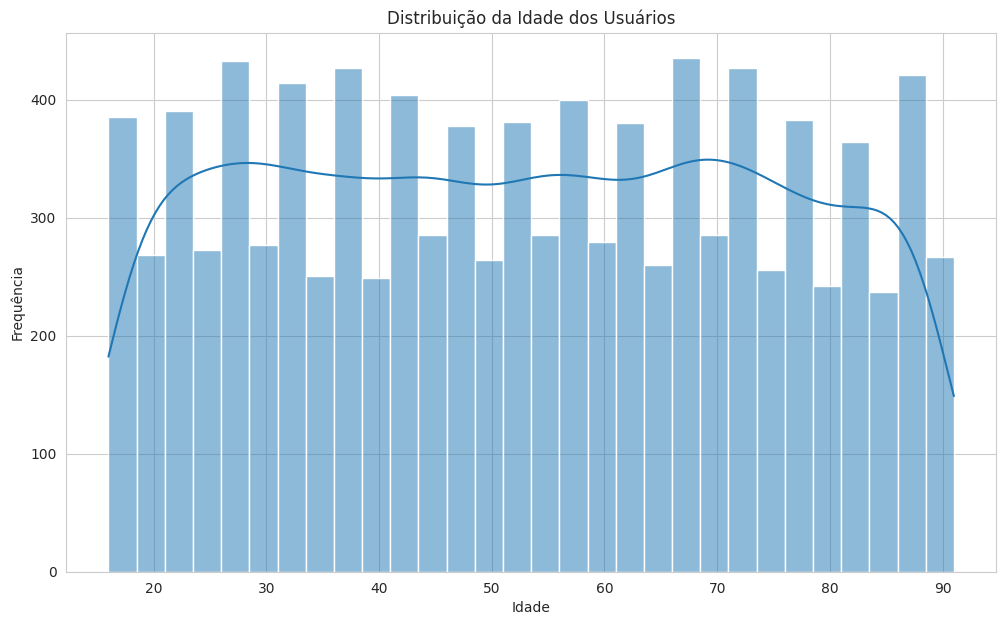

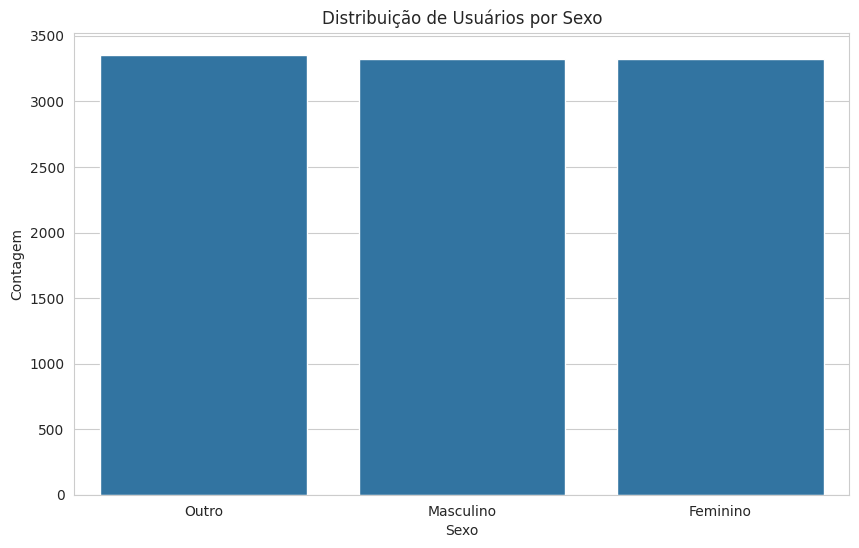

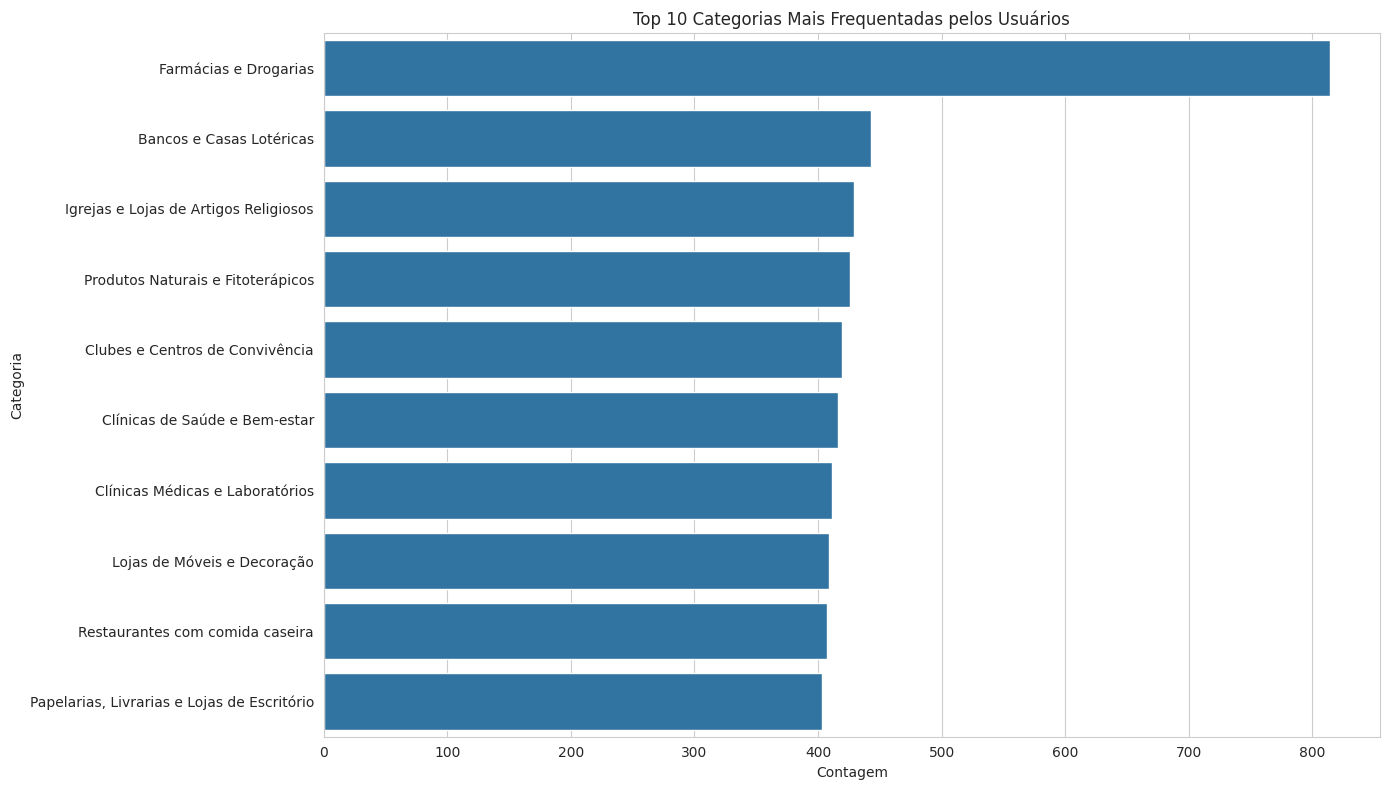


Análise: Transações

Estatísticas Descritivas para 'valor_cupom' e 'repasse_picmoney':
         valor_cupom  repasse_picmoney
count  100000.000000     100000.000000
mean      550.489585         70.474739
std       259.410143         90.823519
min       100.010000          1.070000
25%       326.627500         16.180000
50%       550.265000         32.815000
75%       774.910000         80.160000
max       999.960000        497.320000


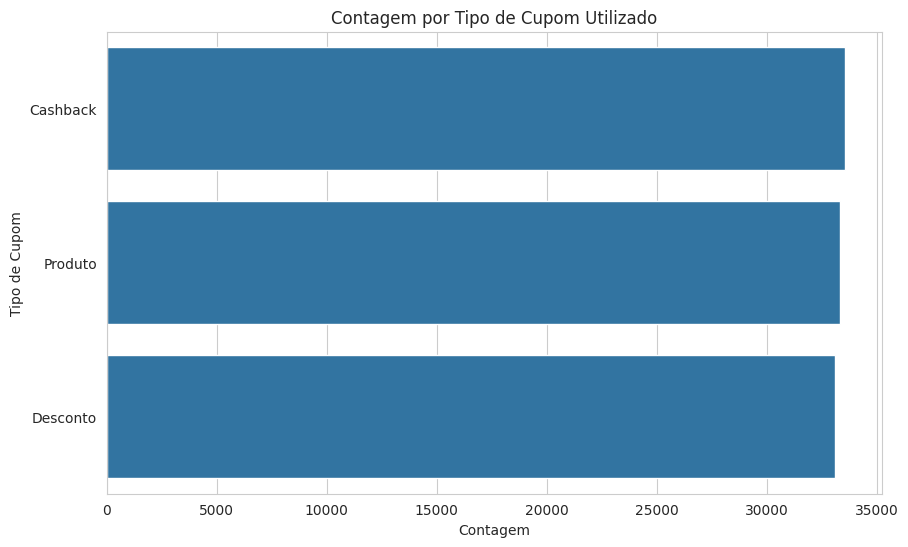

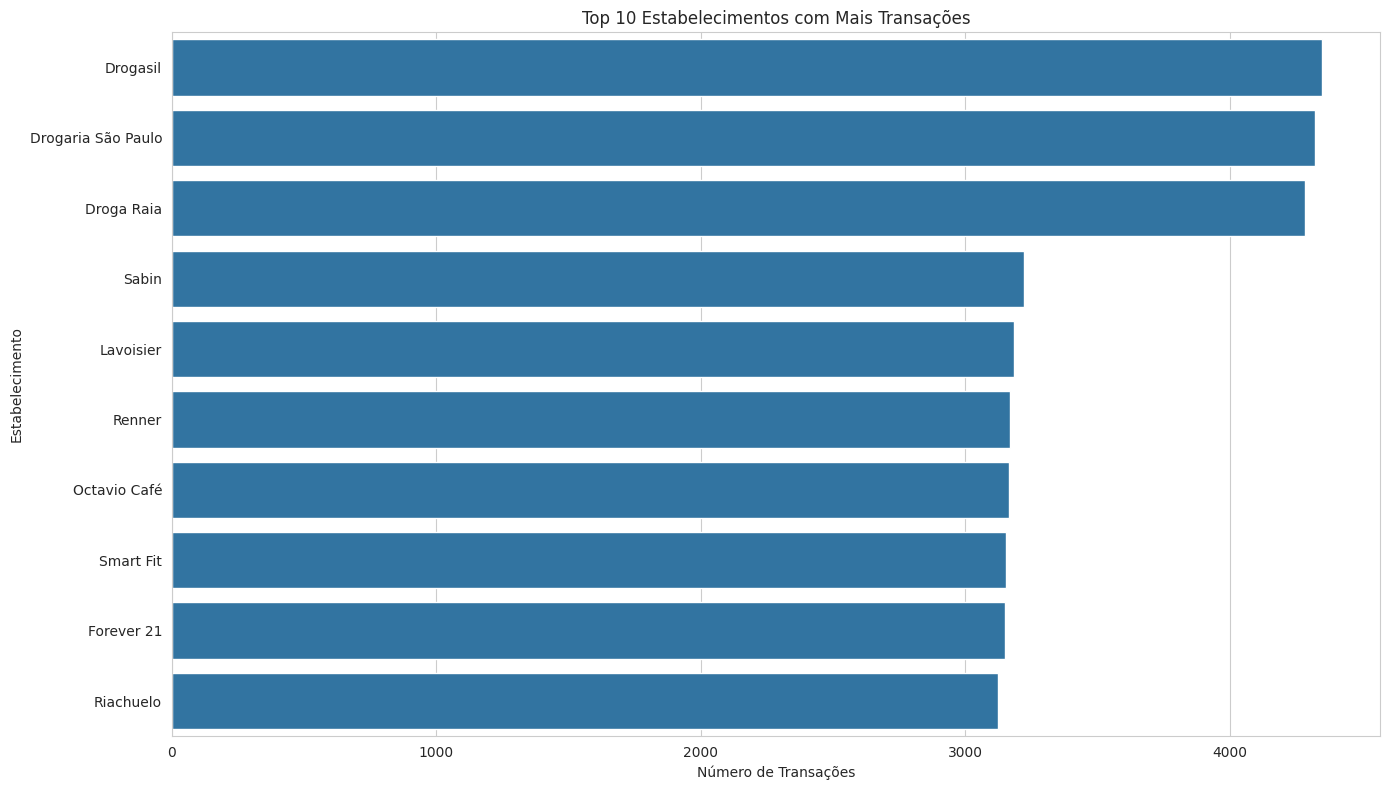

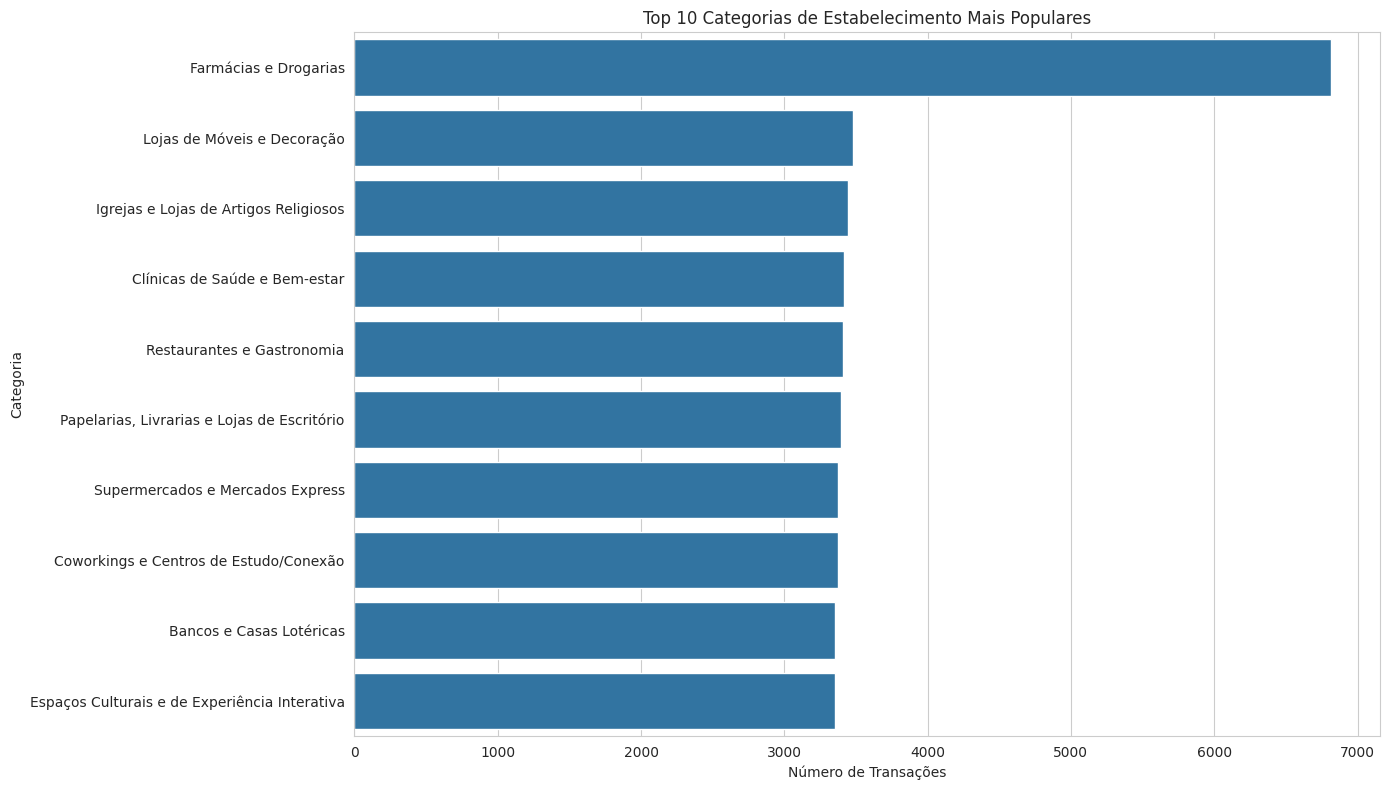


Análise: Pedestres


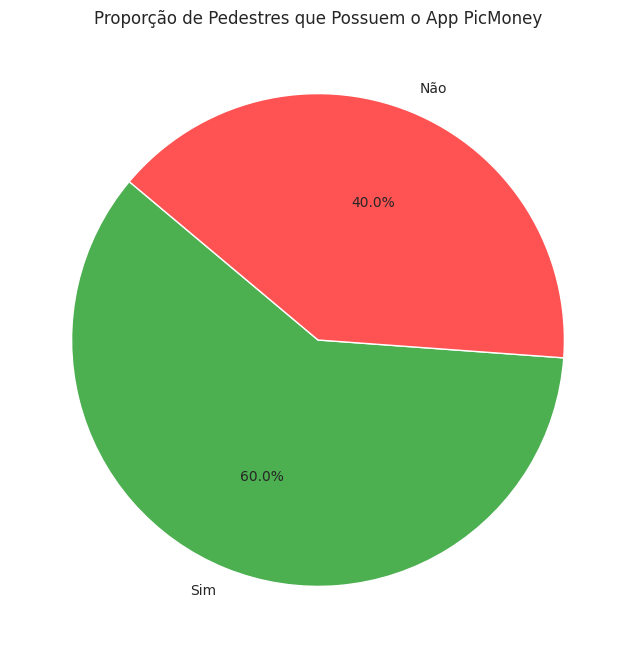

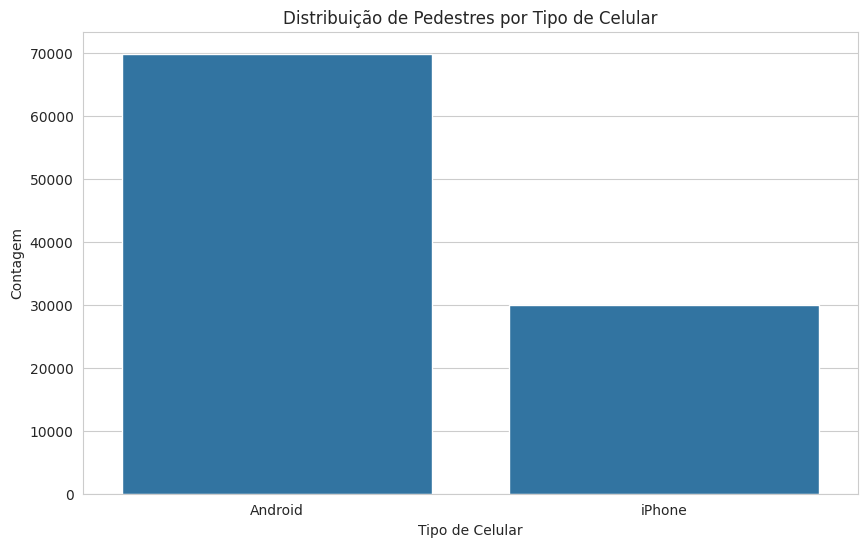

In [3]:
# Parte 3: Análise Exploratória de Dados

# 3.1 Análise do Cadastro de Usuários (df_cadastro)

print("\nAnálise: Cadastro de Usuários")

# Estatísticas descritivas da idade
print("\nEstatísticas Descritivas para a coluna 'idade':")
print(df_cadastro['idade'].describe())

# Histograma da distribuição de idade
plt.figure(figsize=(12, 7))
sns.histplot(df_cadastro['idade'], bins=30, kde=True)
plt.title('Distribuição da Idade dos Usuários')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

# Gráfico de barras para distribuição por sexo
plt.figure(figsize=(10, 6))
sns.countplot(x='sexo', data=df_cadastro, order=df_cadastro['sexo'].value_counts().index)
plt.title('Distribuição de Usuários por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.show()

# Gráfico de barras para as 10 categorias frequentadas mais comuns
plt.figure(figsize=(14, 8))
top_10_categorias = df_cadastro['categoria_frequentada'].value_counts().nlargest(10)
sns.barplot(y=top_10_categorias.index, x=top_10_categorias.values, orient='h')
plt.title('Top 10 Categorias Mais Frequentadas pelos Usuários')
plt.xlabel('Contagem')
plt.ylabel('Categoria')
plt.tight_layout()
plt.show()

# 3.2 Análise das Transações (df_transacoes)

print("\nAnálise: Transações")

# Estatísticas descritivas para valor_cupom e repasse_picmoney
print("\nEstatísticas Descritivas para 'valor_cupom' e 'repasse_picmoney':")
print(df_transacoes[['valor_cupom', 'repasse_picmoney']].describe())

# Gráfico de barras para tipo de cupom
plt.figure(figsize=(10, 6))
sns.countplot(y='tipo_cupom', data=df_transacoes, order=df_transacoes['tipo_cupom'].value_counts().index)
plt.title('Contagem por Tipo de Cupom Utilizado')
plt.xlabel('Contagem')
plt.ylabel('Tipo de Cupom')
plt.show()

# Gráfico de barras para os 10 estabelecimentos com mais transações
plt.figure(figsize=(14, 8))
top_10_estabelecimentos = df_transacoes['nome_estabelecimento'].value_counts().nlargest(10)
sns.barplot(y=top_10_estabelecimentos.index, x=top_10_estabelecimentos.values, orient='h')
plt.title('Top 10 Estabelecimentos com Mais Transações')
plt.xlabel('Número de Transações')
plt.ylabel('Estabelecimento')
plt.tight_layout()
plt.show()

# Gráfico de barras para as 10 categorias de estabelecimento mais populares
plt.figure(figsize=(14, 8))
top_10_cat_estab = df_transacoes['categoria_estabelecimento'].value_counts().nlargest(10)
sns.barplot(y=top_10_cat_estab.index, x=top_10_cat_estab.values, orient='h')
plt.title('Top 10 Categorias de Estabelecimento Mais Populares')
plt.xlabel('Número de Transações')
plt.ylabel('Categoria')
plt.tight_layout()
plt.show()

# 3.3 Análise dos Pedestres (df_pedestres)

print("\nAnálise: Pedestres")

# Gráfico de pizza para proporção de posse do app
plt.figure(figsize=(8, 8))
app_counts = df_pedestres['possui_app_picmoney'].value_counts()
plt.pie(app_counts, labels=app_counts.index, autopct='%1.1f%%', startangle=140, colors=['#4CAF50', '#FF5252'])
plt.title('Proporção de Pedestres que Possuem o App PicMoney')
plt.ylabel('')
plt.show()

# Gráfico de barras para distribuição por tipo de celular
plt.figure(figsize=(10, 6))
sns.countplot(x='tipo_celular', data=df_pedestres, order=df_pedestres['tipo_celular'].value_counts().index)
plt.title('Distribuição de Pedestres por Tipo de Celular')
plt.xlabel('Tipo de Celular')
plt.ylabel('Contagem')
plt.show()

Juntando df_cadastro com df_transacoes pela coluna 'celular'...
DataFrames juntados com sucesso.
Dimensões do DataFrame combinado: (100011, 22)
           celular data_nascimento  idade       sexo cidade_residencial  \
0  (11) 91409-5506      1969-12-10     55  Masculino          São Paulo   
1  (11) 91409-5506      1969-12-10     55  Masculino          São Paulo   
2  (11) 91409-5506      1969-12-10     55  Masculino          São Paulo   
3  (11) 91409-5506      1969-12-10     55  Masculino          São Paulo   
4  (11) 91409-5506      1969-12-10     55  Masculino          São Paulo   

  bairro_residencial cidade_trabalho bairro_trabalho cidade_escola  \
0                 Sé             NaN             NaN           NaN   
1                 Sé             NaN             NaN           NaN   
2                 Sé             NaN             NaN           NaN   
3                 Sé             NaN             NaN           NaN   
4                 Sé             NaN             NaN   

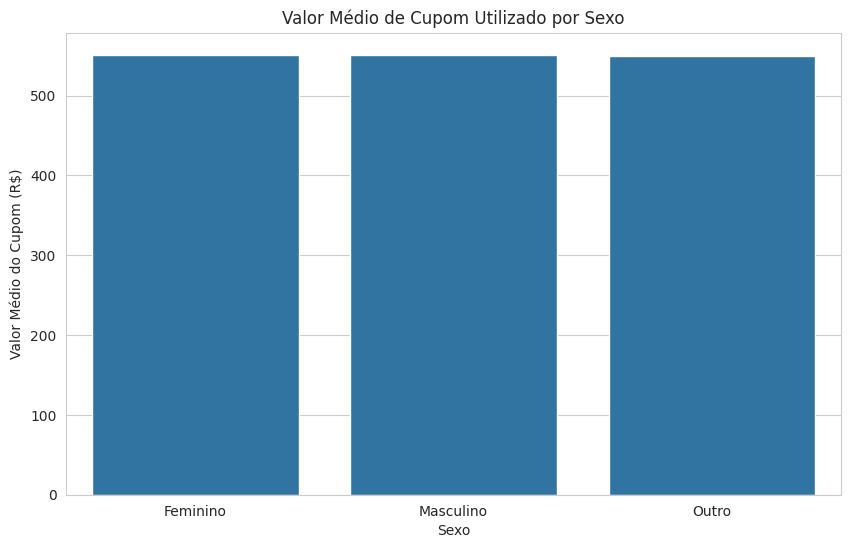


Analisando valor médio do cupom por faixa etária...
  faixa_etaria  valor_cupom
0         0-18   546.316466
1        19-25   547.203876
2        26-35   550.711409
3        36-50   553.278122
4        51-65   552.406382
5          65+   548.824723


/tmp/ipython-input-3839654744.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  valor_medio_por_idade = df_merged.groupby('faixa_etaria')['valor_cupom'].mean().reset_index()


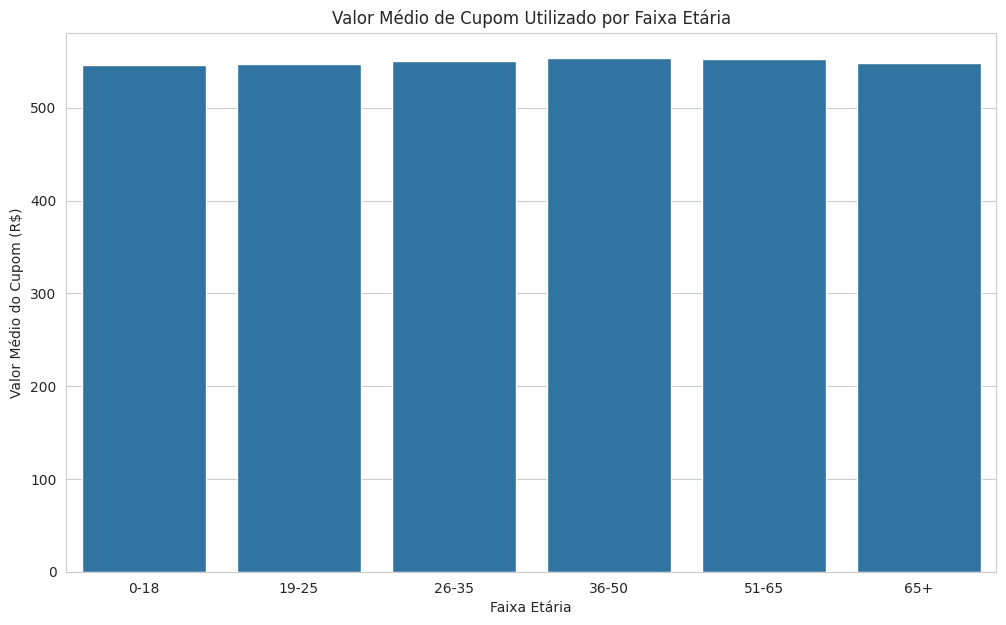

In [4]:
# Parte 4: Junção e Análise Combinada

# 4.1 Junção dos DataFrames de Cadastro e Transações

print("Juntando df_cadastro com df_transacoes pela coluna 'celular'...")
df_merged = pd.merge(df_cadastro, df_transacoes, on='celular', how='inner')
print("DataFrames juntados com sucesso.")
print(f"Dimensões do DataFrame combinado: {df_merged.shape}")
print(df_merged.head())

# 4.2 Análise do Valor Médio de Cupom por Sexo

print("\nCalculando valor médio do cupom por sexo...")
valor_medio_por_sexo = df_merged.groupby('sexo')['valor_cupom'].mean().reset_index()
print(valor_medio_por_sexo)

plt.figure(figsize=(10, 6))
sns.barplot(x='sexo', y='valor_cupom', data=valor_medio_por_sexo)
plt.title('Valor Médio de Cupom Utilizado por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Valor Médio do Cupom (R$)')
plt.show()


# 4.3 Análise do Valor Médio de Cupom por Faixa Etária

print("\nAnalisando valor médio do cupom por faixa etária...")
bins = [0, 18, 25, 35, 50, 65, 100]
labels = ['0-18', '19-25', '26-35', '36-50', '51-65', '65+']
df_merged['faixa_etaria'] = pd.cut(df_merged['idade'], bins=bins, labels=labels, right=False)

valor_medio_por_idade = df_merged.groupby('faixa_etaria')['valor_cupom'].mean().reset_index()
print(valor_medio_por_idade)

plt.figure(figsize=(12, 7))
sns.barplot(x='faixa_etaria', y='valor_cupom', data=valor_medio_por_idade)
plt.title('Valor Médio de Cupom Utilizado por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Valor Médio do Cupom (R$)')
plt.show()